In [1]:
# load modules

import xarray as xr               # Open and process module outputs (.nc files)
import numpy as np                # Process outputs
import matplotlib.pyplot as plt   # Create figures

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the paths where the model outputs are stored 

path_dyn_2d = '/scratch/network/AOS578/datasets_2/dataset_dynamics_2d.nc' # 2d - physical variables
path_dyn_3d = '/scratch/network/AOS578/datasets_2/dataset_dynamics_3d.nc' # 3d - physical variables
path_bio_2d = '/scratch/network/AOS578/datasets_2/dataset_biology_2d.nc' # 2d - biogeochemical variables
path_bio_3d = '/scratch/network/AOS578/datasets_2/dataset_biology_3d.nc'  # 3d - biogeochemical variables

In [3]:
# Open files with physical outputs
dataset_dynamics_2d = xr.open_dataset(path_dyn_2d) # 2d
dataset_dynamics_3d = xr.open_dataset(path_dyn_3d) # 3d

# Open files with biogeochemical outputs
dataset_biology_2d  = xr.open_dataset(path_bio_2d) # 2d
dataset_biology_3d  = xr.open_dataset(path_bio_3d) # 3d

<div class="alert alert-info">  
The aim is to study the dynamics of phytoplankton bloom in three different ocean biomes: the
subtropical gyre, the jet and the subpolar gyre. First, select one of the three phytoplankton in the
model (small - sm, diazotroph - di, large -lg. Tip: large phytoplankton is the easiest to study). Then
select a point in each biome, for example: subtropical gyre (lon = -40°E, lat = 26°N), jet (lon = -
40°E, lat = 40°N) and subpolar gyre (lon = -40°E, lat = 55°N).
</div>

In [4]:
# select surface large phytoplankton concentration at each of the three locations

surf_large_p_conc_subtropical = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 26.5, z_l=2.5)
surf_large_p_conc_jet = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 40.5, z_l=2.5)
surf_large_p_conc_subpolar = dataset_biology_3d.nlg.sel(xh = -40.5, yh = 55.5, z_l=2.5)

x = -40.5
subt_y = 26.5
jet_y = 40.5
subp_y = 55.5
surf = 2.5

<div class="alert alert-info">  
In oceanography, satellite observations of surface chlorophyll are routinely used as an
indicator of phytoplankton biomass to study phytoplankton bloom dynamics. For each
of the three biomes, plot time series of surface chlorophyll concentration (mg Chl m-3),
surface phytoplankton concentration (mol m-3) and phytoplankton content in the entire
water column (mol m-2).
</div>

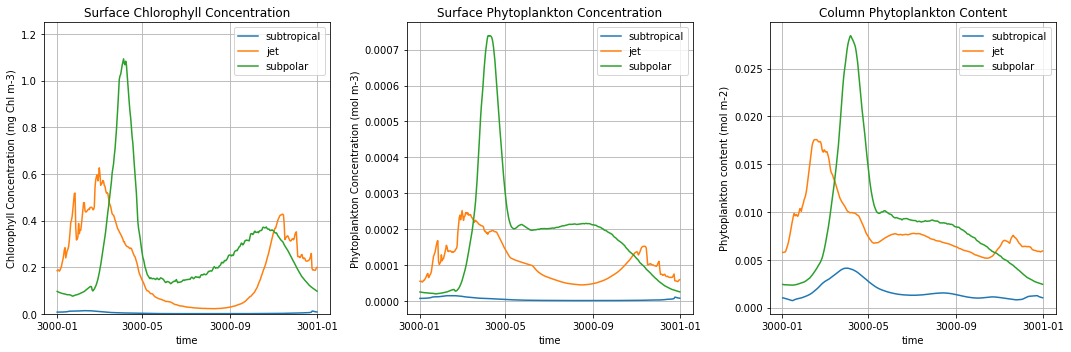

In [5]:
rho = 1035 # kg.m-3

plt.figure(figsize=(15,5))

# Here we plot surface chlorophyll concentration (mg Chl m-3) for all three biomes 
# given data is ug/kg
convert_ug_mg = 1/1000

plt.subplot(131)
(rho * convert_ug_mg * dataset_biology_2d.sfc_chl_lgp.sel(xh = x, yh = subt_y)).plot(label='subtropical')
(rho * convert_ug_mg * dataset_biology_2d.sfc_chl_lgp.sel(xh = x, yh = jet_y)).plot(label='jet')
(rho * convert_ug_mg * dataset_biology_2d.sfc_chl_lgp.sel(xh = x, yh = subp_y)).plot(label='subpolar')

plt.ylim(0,1.25), plt.title('Surface Chlorophyll Concentration'), plt.ylabel("Chlorophyll Concentration (mg Chl m-3)"), plt.legend(), plt.grid()

# Here we plot surface phytoplankton concentration (mol m-3)
# given data is m/kg
convert_uMol_Mol = 1/1e6
plt.subplot(132)
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y, z_l=surf)).plot(label='subtropical')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y, z_l=surf)).plot(label='jet')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y, z_l=surf)).plot(label='subpolar')

plt.title('Surface Phytoplankton Concentration'), plt.ylabel("Phytoplankton Concentration (mol m-3)"), plt.legend(), plt.grid()

# Here we plot phytoplankton content in the entire water column (mol m-2).
plt.subplot(133)
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y) * dataset_biology_3d.thkcello).sum('z_l').plot(label='subtropical')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y) * dataset_biology_3d.thkcello).sum('z_l').plot(label='jet')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y) * dataset_biology_3d.thkcello).sum('z_l').plot(label='subpolar')

plt.title('Column Phytoplankton Content'), plt.ylabel("Phytoplankton content (mol m-2)"), plt.legend(), plt.grid()


plt.tight_layout()

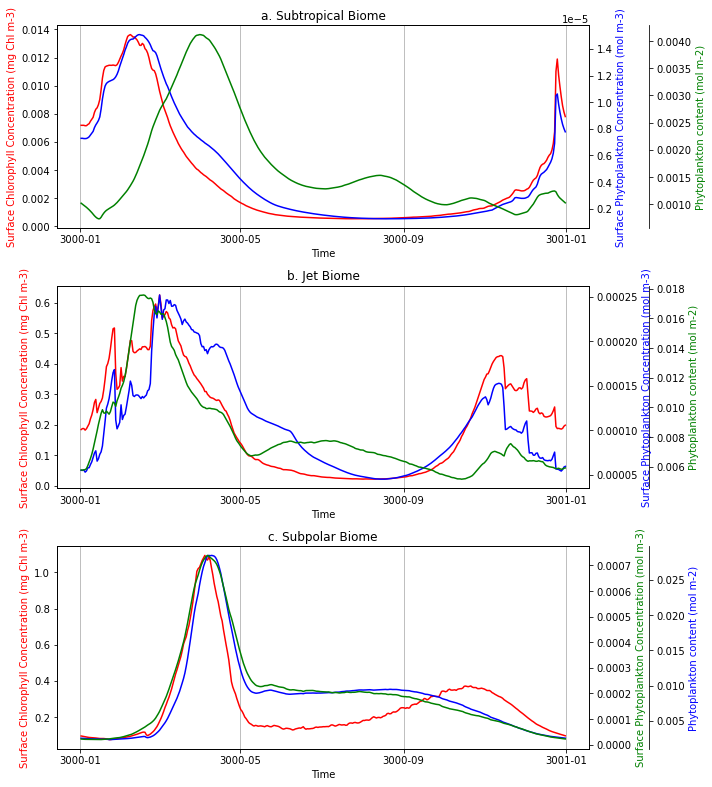

In [13]:

plt.figure(figsize=(10,11))


ax1 = plt.subplot(311)

# Plotting the first line with its own y-axis
ax1.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * convert_ug_mg * dataset_biology_2d.sfc_chl_lgp.sel(xh = x, yh = subt_y)), '-r')
ax1.set_xlabel('Time')
ax1.set_ylabel('Surface Chlorophyll Concentration (mg Chl m-3)', color='r')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y, z_l=surf)), '-b')
ax2.set_ylabel('Surface Phytoplankton Concentration (mol m-3)', color='b')

# Creating a third y-axis with adjusted position
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(dataset_biology_2d.sfc_chl_lgp.time,(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y) * dataset_biology_3d.thkcello).sum('z_l'), '-g')
ax3.set_ylabel('Phytoplankton content (mol m-2)', color='g')

ax1.grid(True, axis='x'), ax2.grid(True, axis='x'), ax3.grid(True, axis='x'), plt.title('a. Subtropical Biome')

# jet -------------
ax4 = plt.subplot(312)

# Plotting the first line with its own y-axis
ax4.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * convert_ug_mg * dataset_biology_2d.sfc_chl_lgp.sel(xh = x, yh = jet_y)), '-r')
ax4.set_xlabel('Time')
ax4.set_ylabel('Surface Chlorophyll Concentration (mg Chl m-3)', color='r')

# Creating a second y-axis
ax5 = ax4.twinx()
ax5.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y, z_l=surf)), '-b')
ax5.set_ylabel('Surface Phytoplankton Concentration (mol m-3)', color='b')

# Creating a third y-axis with adjusted position
ax6 = ax4.twinx()
ax6.spines['right'].set_position(('outward', 60))
ax6.plot(dataset_biology_2d.sfc_chl_lgp.time,(rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y) * dataset_biology_3d.thkcello).sum('z_l'), '-g')
ax6.set_ylabel('Phytoplankton content (mol m-2)', color='g')

ax4.grid(True, axis='x'), ax5.grid(True, axis='x'), ax6.grid(True, axis='x'), plt.title('b. Jet Biome')

# subpolar -----------
ax7 = plt.subplot(313)

# Plotting the first line with its own y-axis
ax7.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * convert_ug_mg * dataset_biology_2d.sfc_chl_lgp.sel(xh = x, yh = subp_y)), '-r')
ax7.set_xlabel('Time')
ax7.set_ylabel('Surface Chlorophyll Concentration (mg Chl m-3)', color='r')

# Creating a second y-axis
ax8 = ax7.twinx()
ax8.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y, z_l=surf)), '-b')
ax8.set_ylabel('Surface Phytoplankton Concentration (mol m-3)', color='g')

# Creating a third y-axis with adjusted position
ax9 = ax7.twinx()
ax9.spines['right'].set_position(('outward', 60))
ax9.plot(dataset_biology_2d.sfc_chl_lgp.time,(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y) * dataset_biology_3d.thkcello).sum('z_l'), '-g')
ax9.set_ylabel('Phytoplankton content (mol m-2)', color='b')

ax7.grid(True, axis='x'), ax8.grid(True, axis='x'), ax9.grid(True, axis='x'), plt.title('c. Subpolar Biome')

plt.tight_layout()



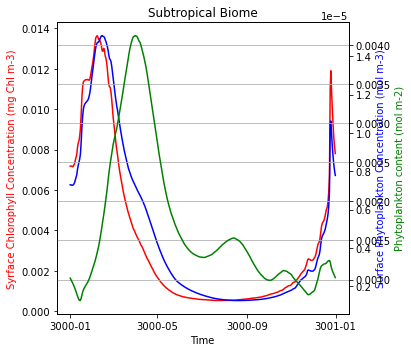

In [22]:
rho = 1035 # kg.m-3

plt.figure(figsize=(15,5))

# Here we plot surface chlorophyll concentration (mg Chl m-3) for all three biomes 
# given data is ug/kg
convert_ug_mg = 1/1000

ax1 = plt.subplot(131)
ax1.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * convert_ug_mg * dataset_biology_2d.sfc_chl_lgp.sel(xh = x, yh = subt_y)), '-r')
ax1.set_xlabel('Time')
ax1.set_ylabel('Syrface Chlorophyll Concentration (mg Chl m-3)', color='r')
ax2 = ax1.twinx()
ax2.plot(dataset_biology_2d.sfc_chl_lgp.time, (rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y, z_l=surf)), '-b', )
ax2.set_ylabel('Surface Phytoplankton Concentration (mol m-3)', color='b')
ax2.grid(axis = "x")
ax3 = ax1.twinx()
ax3.plot(dataset_biology_2d.sfc_chl_lgp.time,(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y) * dataset_biology_3d.thkcello).sum('z_l'), '-g')
ax3.set_ylabel('Phytoplankton content (mol m-2)', color='g')


plt.title('Subtropical Biome'), plt.grid()


plt.tight_layout()

<div class="alert alert-info">  
For each biome, look at the concentration of nitrate, phytoplankton and zooplankton (of
the same size as the phytoplankton you've chosen) as a function of time and depth, as
well as the depth of the active mixing layer (variable h_ML) and the mixed layer
(variable MLD_003).
</div>

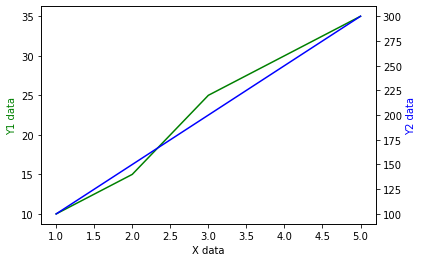

In [6]:
import matplotlib.pyplot as plt

# Data for first line
x1 = [1, 2, 3, 4, 5]
y1 = [10, 15, 25, 30, 35]

# Data for second line (with different scale)
x2 = [1, 2, 3, 4, 5]
y2 = [100, 150, 200, 250, 300]

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot first line with primary y-axis
ax1.plot(x1, y1, 'g-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

# Create secondary y-axis and plot second line
ax2 = ax1.twinx()
ax2.plot(x2, y2, 'b-')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [75]:
dataset_biology_3d.nlgz

<xarray.DataArray 'nlgz' (time: 365, z_l: 30, yh: 42, xh: 42)>
[19315800 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -55.5 -54.5 -53.5 -52.5 ... -17.5 -16.5 -15.5 -14.5
  * yh       (yh) float64 19.5 20.5 21.5 22.5 23.5 ... 56.5 57.5 58.5 59.5 60.5
  * time     (time) object 3000-01-01 12:00:00 ... 3000-12-31 12:00:00
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 2.5e+03 3e+03 3.5e+03 4e+03
Attributes:
    long_name:      large Zooplankton Nitrogen
    units:          mol/kg
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT

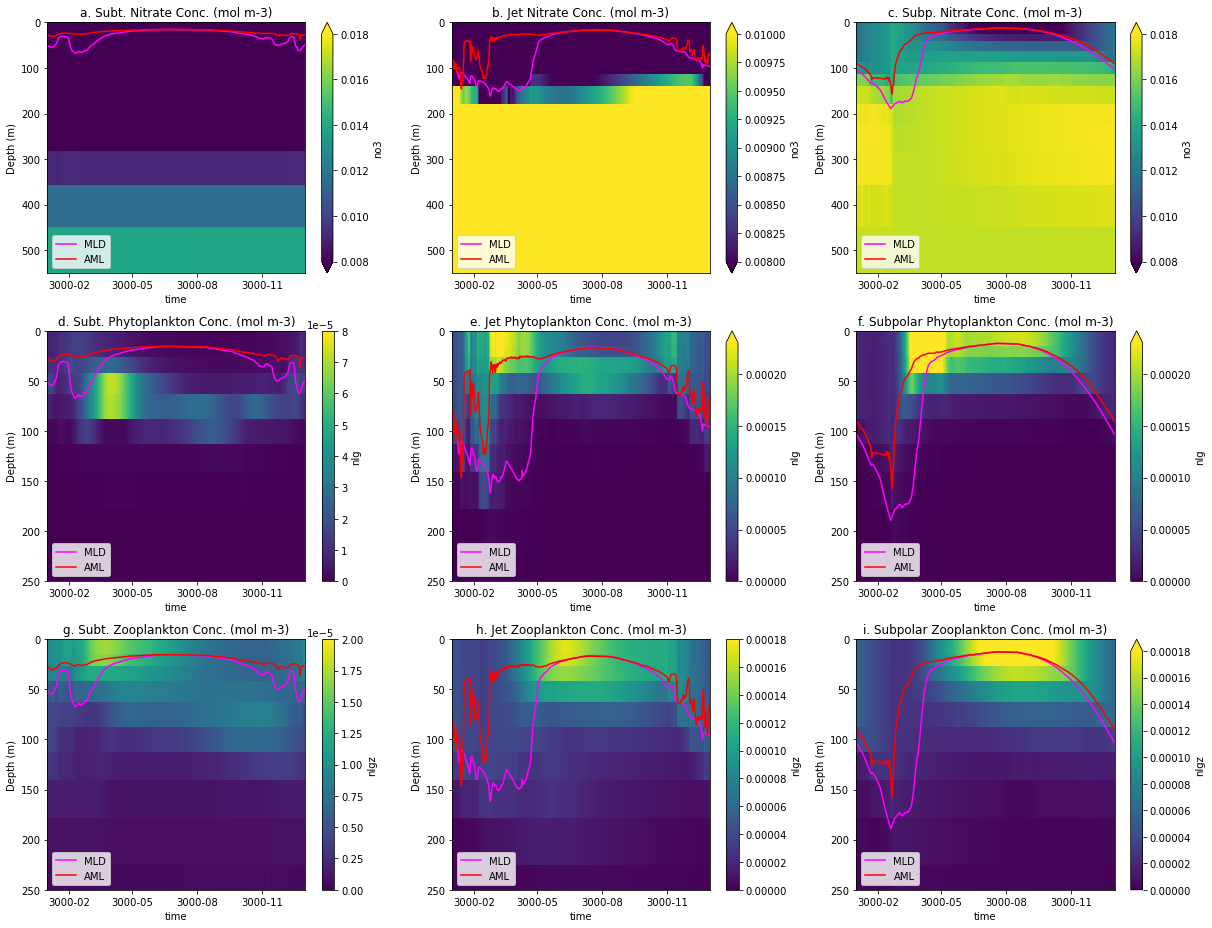

In [17]:
plt.figure(figsize=(17,13))

# plotting nitrate concentration (mol/m^-3)
plt.subplot(331)
(rho * dataset_biology_3d.no3.sel(xh = x, yh = subt_y)).plot(y='z_l', vmin = .008, vmax = .018)
plt.ylim(0,550), plt.gca().invert_yaxis()
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subt_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subt_y).plot(color='red', label="AML")
plt.title('a. Subt. Nitrate Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

plt.subplot(332)
(rho * dataset_biology_3d.no3.sel(xh = x, yh = jet_y)).plot(y='z_l',  vmin = .008, vmax = .01)
plt.ylim(0,550), plt.gca().invert_yaxis(), plt.title('Jet Nitrate Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = jet_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = jet_y).plot(color='red', label="AML")
plt.title('b. Jet Nitrate Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

plt.subplot(333)
(rho * dataset_biology_3d.no3.sel(xh = x, yh = subp_y)).plot(y='z_l',  vmin = .008, vmax = .018)
plt.ylim(0,550), plt.gca().invert_yaxis(), plt.title('Subpolar Nitrate Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subp_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subp_y).plot(color='red', label="AML")
plt.title('c. Subp. Nitrate Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

# plotting phytoplankton concentration (mol m^-3)
plt.subplot(334)
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y)).plot(y='z_l', vmin = 0.0, vmax = .00008)
plt.ylim(0,250), plt.gca().invert_yaxis(), plt.title('Subt. Phytoplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subt_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subt_y).plot(color='red', label="AML")
plt.title('d. Subt. Phytoplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

plt.subplot(335)
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y)).plot(y='z_l', vmin = 0.0, vmax = .00023)
plt.ylim(0,250), plt.gca().invert_yaxis(), plt.title('Jet Phytoplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = jet_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = jet_y).plot(color='red', label="AML")
plt.title('e. Jet Phytoplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

plt.subplot(336)
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y)).plot(y='z_l', vmin = 0.0, vmax = .00023)
plt.ylim(0,250), plt.gca().invert_yaxis(), plt.title('Subpolar Phytoplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subp_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subp_y).plot(color='red', label="AML")
plt.title('f. Subpolar Phytoplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

# plotting zooplankton concentration (mol m^-3)
plt.subplot(337)
(rho * dataset_biology_3d.nlgz.sel(xh = x, yh = subt_y)).plot(y='z_l', vmin = 0.0, vmax = .00002)
plt.ylim(0,250), plt.gca().invert_yaxis(), plt.title('Subt. Zooplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subt_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subt_y).plot(color='red', label="AML")
plt.title('g. Subt. Zooplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

plt.subplot(338)
(rho * dataset_biology_3d.nlgz.sel(xh = x, yh = jet_y)).plot(y='z_l', vmin = 0.0, vmax = .00018)
plt.ylim(0,250), plt.gca().invert_yaxis(), plt.title('Jet Zooplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = jet_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = jet_y).plot(color='red', label="AML")
plt.title('h. Jet Zooplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()

plt.subplot(339)
(rho * dataset_biology_3d.nlgz.sel(xh = x, yh = subp_y)).plot(y='z_l', vmin = 0.0, vmax = .00018)
plt.ylim(0,250), plt.gca().invert_yaxis(), plt.title('Subpolar Zooplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)")
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subp_y).plot(color='magenta', label="MLD")
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subp_y).plot(color='red', label="AML")
plt.title('i. Subpolar Zooplankton Conc. (mol m-3)'), plt.ylabel("Depth (m)"), plt.legend()


plt.tight_layout()

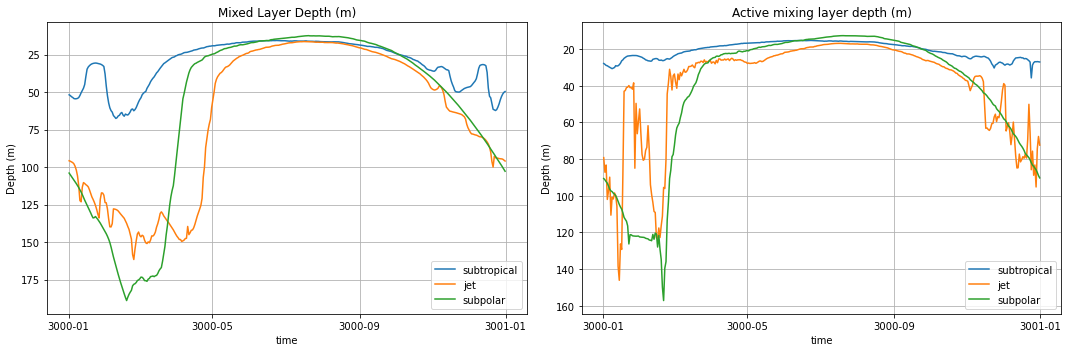

In [8]:
# depth of active mixed layer and mixing layer 

from matplotlib.dates import DateFormatter

rho = 1035 # kg.m-3

plt.figure(figsize=(15,5))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(121)
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subt_y).plot(label='subtropical')
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = jet_y).plot(label='jet')
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subp_y).plot(label='subpolar')

ax1.locator_params(axis='x', nbins=6) , plt.gca().invert_yaxis(), plt.title('Mixed Layer Depth (m)'), plt.ylabel("Depth (m)"), plt.legend(), plt.grid()

plt.subplot(122)
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subt_y).plot(label='subtropical')
dataset_dynamics_2d.h_ML.sel(xh = x, yh = jet_y).plot(label='jet')
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subp_y).plot(label='subpolar')

plt.gca().invert_yaxis(), plt.title('Active mixing layer depth (m)'), plt.ylabel("Depth (m)"), plt.legend(),plt.grid()


plt.tight_layout()

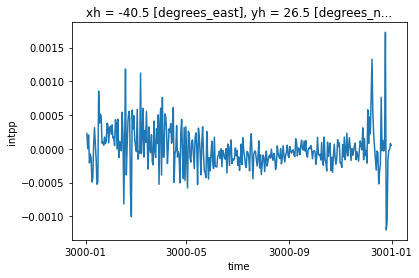

In [127]:
# units 
s_to_days = 86400
(s_to_days * dataset_biology_2d.intpp.sel(xh = x, yh = subt_y).diff('time')).plot()

In [135]:
dataset_biology_2d.intpp

<xarray.DataArray 'intpp' (time: 365, yh: 42, xh: 42)>
[643860 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -55.5 -54.5 -53.5 -52.5 ... -17.5 -16.5 -15.5 -14.5
  * yh       (yh) float64 19.5 20.5 21.5 22.5 23.5 ... 56.5 57.5 58.5 59.5 60.5
  * time     (time) object 3000-01-01 12:00:00 ... 3000-12-31 12:00:00
Attributes:
    long_name:      Primary Organic Carbon Production by All Types of Phytopl...
    units:          mol m-2 s-1
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  net_primary_mole_productivity_of_biomass_expressed_as_car...

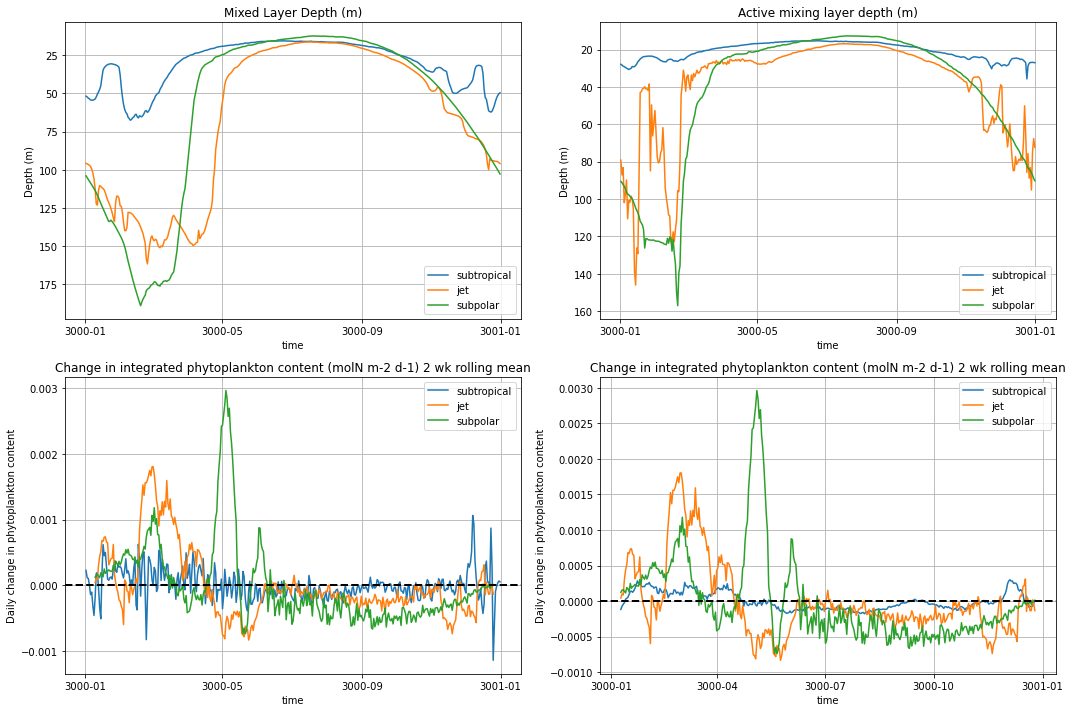

In [7]:
# depth of active mixed layer and mixing layer 

from matplotlib.dates import DateFormatter

rho = 1035 # kg.m-3

plt.figure(figsize=(15,10))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(221)
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subt_y).plot(label='subtropical')
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = jet_y).plot(label='jet')
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subp_y).plot(label='subpolar')
ax1.locator_params(axis='x', nbins=6) , plt.gca().invert_yaxis(), plt.title('Mixed Layer Depth (m)'), plt.ylabel("Depth (m)"), plt.legend(), plt.grid()

plt.subplot(222)
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subt_y).plot(label='subtropical')
dataset_dynamics_2d.h_ML.sel(xh = x, yh = jet_y).plot(label='jet')
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subp_y).plot(label='subpolar')
plt.gca().invert_yaxis(), plt.title('Active mixing layer depth (m)'), plt.ylabel("Depth (m)"), plt.legend(), plt.grid()

plt.subplot(223)
s_to_days = 86400
(s_to_days * dataset_biology_2d.intpp.sel(xh = x, yh = subt_y).differentiate('time', datetime_unit='D')).plot(label='subtropical')
(s_to_days * dataset_biology_2d.intpp.sel(xh = x, yh = jet_y).diff('time')).rolling(time=14, center=True).mean().plot(label='jet')
(s_to_days * dataset_biology_2d.intpp.sel(xh = x, yh = subp_y).diff('time')).rolling(time=14, center=True).mean().plot(label='subpolar')
plt. axhline(y=0, color='k', linestyle='--', linewidth=2) 
plt.title('Change in integrated phytoplankton content (molN m-2 d-1) 2 wk rolling mean'), plt.ylabel("Daily change in phytoplankton content"), plt.legend(), plt.grid()


plt.subplot(224)
s_to_days = 86400
(s_to_days * dataset_biology_2d.intpp.sel(xh = x, yh = subt_y).diff('time')).rolling(time=14, center=True).mean().plot(label='subtropical')
(s_to_days * dataset_biology_2d.intpp.sel(xh = x, yh = jet_y).diff('time')).rolling(time=14, center=True).mean().plot(label='jet')
(s_to_days * dataset_biology_2d.intpp.sel(xh = x, yh = subp_y).diff('time')).rolling(time=14, center=True).mean().plot(label='subpolar')
plt. axhline(y=0, color='k', linestyle='--', linewidth=2) 
plt.title('Change in integrated phytoplankton content (molN m-2 d-1) 2 wk rolling mean'), plt.ylabel("Daily change in phytoplankton content"), plt.legend(), plt.grid()

plt.tight_layout()

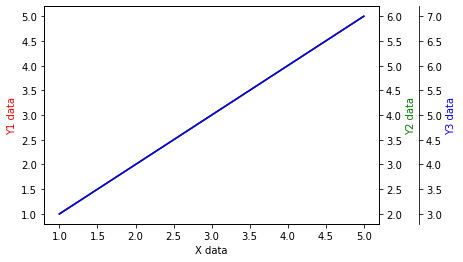

In [11]:
import matplotlib.pyplot as plt

# Data for the lines
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [2, 3, 4, 5, 6]
y3 = [3, 4, 5, 6, 7]

fig, ax1 = plt.subplots()

# Plotting the first line with its own y-axis
ax1.plot(x, y1, 'r-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='r')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, 'g-')
ax2.set_ylabel('Y2 data', color='g')

# Creating a third y-axis with adjusted position
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))
ax3.plot(x, y3, 'b-')
ax3.set_ylabel('Y3 data', color='b')

plt.show()


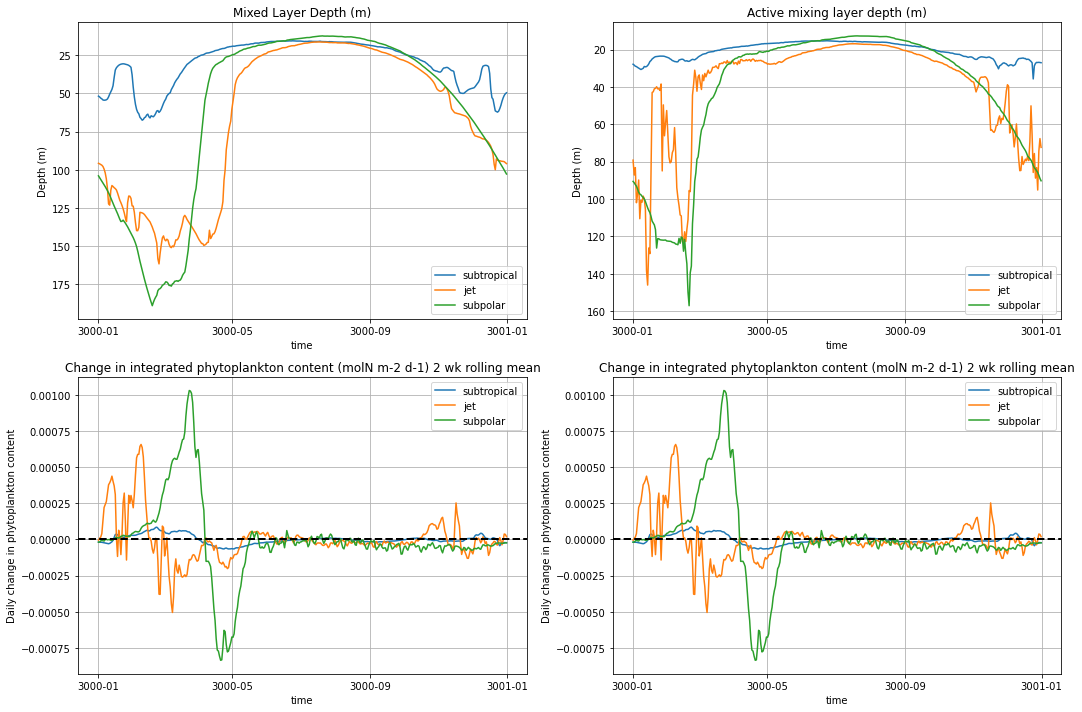

In [11]:
# depth of active mixed layer and mixing layer 

from matplotlib.dates import DateFormatter

rho = 1035 # kg.m-3

plt.figure(figsize=(15,10))

# Here we plot mixed layer and mixing layer depth for all 3 biomes 
# given data is in m

ax1 = plt.subplot(221)
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subt_y).plot(label='subtropical')
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = jet_y).plot(label='jet')
dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subp_y).plot(label='subpolar')
ax1.locator_params(axis='x', nbins=6) , plt.gca().invert_yaxis(), plt.title('Mixed Layer Depth (m)'), plt.ylabel("Depth (m)"), plt.legend(), plt.grid()

plt.subplot(222)
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subt_y).plot(label='subtropical')
dataset_dynamics_2d.h_ML.sel(xh = x, yh = jet_y).plot(label='jet')
dataset_dynamics_2d.h_ML.sel(xh = x, yh = subp_y).plot(label='subpolar')
plt.gca().invert_yaxis(), plt.title('Active mixing layer depth (m)'), plt.ylabel("Depth (m)"), plt.legend(), plt.grid()

plt.subplot(223)
s_to_days = 86400
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D').plot(label='subtropical')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D').plot(label='jet')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D').plot(label='subpolar')
plt. axhline(y=0, color='k', linestyle='--', linewidth=2) 
plt.title('Change in integrated phytoplankton content (molN m-2 d-1) 2 wk rolling mean'), plt.ylabel("Daily change in phytoplankton content"), plt.legend(), plt.grid()


plt.subplot(224)
s_to_days = 86400
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D').plot(label='subtropical')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D').plot(label='jet')
(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D').plot(label='subpolar')
plt. axhline(y=0, color='k', linestyle='--', linewidth=2) 
plt.title('Change in integrated phytoplankton content (molN m-2 d-1) 2 wk rolling mean'), plt.ylabel("Daily change in phytoplankton content"), plt.legend(), plt.grid()



plt.tight_layout()

In [12]:
dataset_biology_3d.nlg

<xarray.DataArray 'nlg' (time: 365, z_l: 30, yh: 42, xh: 42)>
[19315800 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -55.5 -54.5 -53.5 -52.5 ... -17.5 -16.5 -15.5 -14.5
  * yh       (yh) float64 19.5 20.5 21.5 22.5 23.5 ... 56.5 57.5 58.5 59.5 60.5
  * time     (time) object 3000-01-01 12:00:00 ... 3000-12-31 12:00:00
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 2.5e+03 3e+03 3.5e+03 4e+03
Attributes:
    long_name:      Large Phytoplankton Nitrogen
    units:          mol/kg
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT

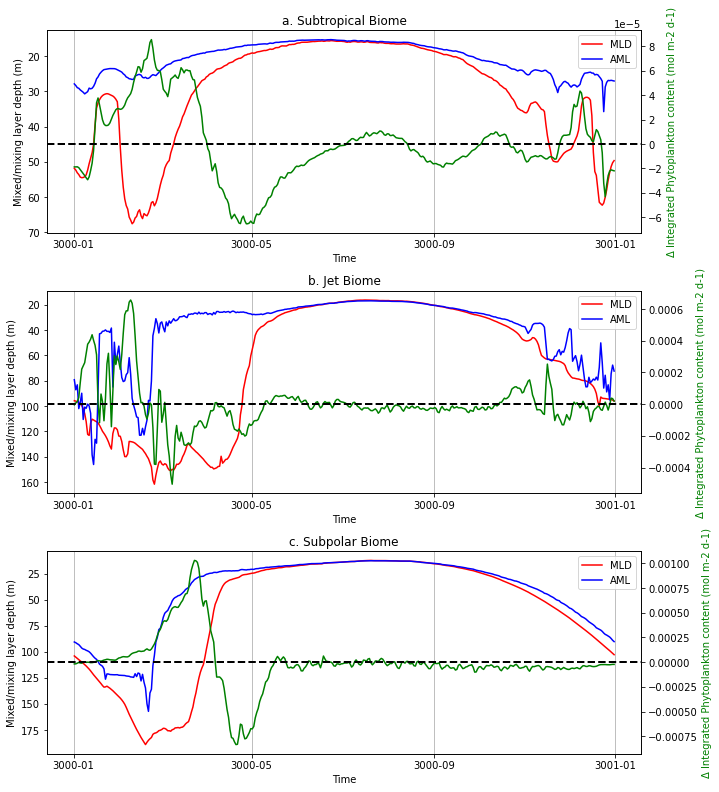

In [34]:

plt.figure(figsize=(10,11))


ax1 = plt.subplot(311)

# Plotting the first line with its own y-axis

ax1.plot(dataset_biology_2d.sfc_chl_lgp.time, dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subt_y), '-r', label='MLD')
ax1.plot(dataset_biology_2d.sfc_chl_lgp.time, dataset_dynamics_2d.h_ML.sel(xh = x, yh = subt_y), '-b', label='AML')
ax1.set_xlabel('Time')
ax1.set_ylabel('Mixed/mixing layer depth (m)', color='k')
ax1.invert_yaxis(), ax1.legend()


# Creating a third y-axis with adjusted position
ax3 = ax1.twinx()
ax3.spines['right']
ax3.plot(dataset_biology_2d.sfc_chl_lgp.time,(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subt_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D'), '-g')
ax3.set_ylabel('Δ Integrated Phytoplankton content (mol m-2 d-1)', color='g')
plt. axhline(y=0, color='k', linestyle='--', linewidth=2) 
ax1.grid(True, axis='x'), ax2.grid(True, axis='x'), ax3.grid(True, axis='x'), plt.title('a. Subtropical Biome')

# jet -------------
ax4 = plt.subplot(312)

# Plotting the first line with its own y-axis
ax4.plot(dataset_biology_2d.sfc_chl_lgp.time, dataset_dynamics_2d.MLD_003.sel(xh = x, yh = jet_y), '-r', label='MLD')
ax4.plot(dataset_biology_2d.sfc_chl_lgp.time, dataset_dynamics_2d.h_ML.sel(xh = x, yh = jet_y), '-b', label='AML')
ax4.set_xlabel('Time')
ax4.set_ylabel('Mixed/mixing layer depth (m)', color='k')
ax4.invert_yaxis(), ax4.legend()


# Creating a third y-axis with adjusted position
ax6 = ax4.twinx()
ax6.spines['right']
ax6.plot(dataset_biology_2d.sfc_chl_lgp.time,(rho * dataset_biology_3d.nlg.sel(xh = x, yh = jet_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D'), '-g')
ax6.set_ylabel('Δ Integrated Phytoplankton content (mol m-2 d-1)', color='g')
plt. axhline(y=0, color='k', linestyle='--', linewidth=2) 
ax4.grid(True, axis='x'), ax6.grid(True, axis='x'), plt.title('b. Jet Biome')

# subpolar -----------
ax7 = plt.subplot(313)

# Plotting the first line with its own y-axis
ax7.plot(dataset_biology_2d.sfc_chl_lgp.time, dataset_dynamics_2d.MLD_003.sel(xh = x, yh = subp_y), '-r', label='MLD')
ax7.plot(dataset_biology_2d.sfc_chl_lgp.time, dataset_dynamics_2d.h_ML.sel(xh = x, yh = subp_y), '-b', label='AML')
ax7.set_xlabel('Time')
ax7.set_ylabel('Mixed/mixing layer depth (m)', color='k')
ax7.invert_yaxis(), ax7.legend()


# Creating a third y-axis with adjusted position
ax9 = ax7.twinx()
ax9.spines['right']
ax9.plot(dataset_biology_2d.sfc_chl_lgp.time,(rho * dataset_biology_3d.nlg.sel(xh = x, yh = subp_y) * dataset_biology_3d.thkcello).sum('z_l').differentiate('time', datetime_unit='D'), '-g')
ax9.set_ylabel('Δ Integrated Phytoplankton content (mol m-2 d-1)', color='g')
plt. axhline(y=0, color='k', linestyle='--', linewidth=2) 
ax7.grid(True, axis='x'), ax9.grid(True, axis='x'), plt.title('c. Subpolar Biome')
plt.tight_layout()

